In [1]:
#import dependencies
import numpy as np
import pandas as pd
import requests
from pathlib import Path 
from sklearn.linear_model import LinearRegression
from io import StringIO
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
file_path = ("Resources/winemag_2018.csv")
df = pd.read_csv(file_path)
df

,country,title,description,designation,points,price,province,region_1,region_2,variety,winery
0,France,Domaine Fernand Engel 2015 Praelatenberg Grand...,\n Beautifully aromatic h...,Praelatenberg Grand Cru,94,50.0,Alsace,Alsace,NaN,Riesling,Domaine Fernand Engel
1,England,Bride Valley Vineyard 2014 Blanc de Blancs Spa...,\n The merest touch of ne...,Blanc de Blancs,94,75.0,England,NaN,NaN,Sparkling Blend,Bride Valley Vineyard
2,US,Byron 2015 La Encantada Vineyard Pinot Noir (S...,\n There's a prominent bu...,La Encantada Vineyard,94,55.0,California,Sta. Rita Hills,Central Coast,Pinot Noir,Byron
3,US,Challen 2015 Zotovich Vineyard Pinot Noir (Sta...,\n Lean and light aromas ...,Zotovich Vineyard,94,60.0,California,Sta. Rita Hills,Central Coast,Pinot Noir,Challen
4,France,Domaine Barmès-Buecher 2016 Hengst Grand Cru G...,\n A citrus zest headines...,Hengst Grand Cru,94,44.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Barmès-Buecher
...,...,...,...,...,...,...,...,...,...,...,...
22944,US,Silvan Ridge 2016 Early Muscat Semi-Sparkling ...,\n Long a staple of the S...,Early Muscat Semi-Sparkling,88,16.0,Oregon,Willamette Valley,Willamette Valley,Sparkling Blend,Silvan Ridge
22945,Italy,Speri 2014 Sant'Urbano (Valpolicella Classico...,\n Aromas of baking spice...,Sant'Urbano,88,29.0,Veneto,Valpolicella Classico Superiore,NaN,Red Blends,Speri
22946,US,Spindrift Cellars 2015 Reserve Pinot Noir (Wil...,\n Though designated a re...,Reserve,88,32.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Spindrift Cellars
22947,US,Ste Michelle Vineyards 2016 Chardonnay (Columb...,\n This wine has a throwb...,NaN,88,11.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Ste Michelle Vineyards


In [3]:
df = df.drop(['title', 'description', 'designation', 'region_1', 'region_2', 'winery'], axis=1)
df

,country,points,price,province,variety
0,France,94,50.0,Alsace,Riesling
1,England,94,75.0,England,Sparkling Blend
2,US,94,55.0,California,Pinot Noir
3,US,94,60.0,California,Pinot Noir
4,France,94,44.0,Alsace,Gewürztraminer
...,...,...,...,...,...
22944,US,88,16.0,Oregon,Sparkling Blend
22945,Italy,88,29.0,Veneto,Red Blends
22946,US,88,32.0,Oregon,Pinot Noir
22947,US,88,11.0,Washington,Chardonnay


In [4]:
df = df.dropna()
df

,country,points,price,province,variety
0,France,94,50.0,Alsace,Riesling
1,England,94,75.0,England,Sparkling Blend
2,US,94,55.0,California,Pinot Noir
3,US,94,60.0,California,Pinot Noir
4,France,94,44.0,Alsace,Gewürztraminer
...,...,...,...,...,...
22944,US,88,16.0,Oregon,Sparkling Blend
22945,Italy,88,29.0,Veneto,Red Blends
22946,US,88,32.0,Oregon,Pinot Noir
22947,US,88,11.0,Washington,Chardonnay


In [5]:
df.isnull().sum()

country     0
points      0
price       0
province    0
variety     0
dtype: int64

In [6]:
point_mean_count = pd.DataFrame(df.groupby('country')['points'].mean())
point_mean_count['count'] = pd.DataFrame(df.groupby('country')['points'].count())
price_mean_count = pd.DataFrame(df.groupby('country')['price'].mean())

In [7]:
point_mean_count

,points,count
country,,
Argentina,87.327835,485
Armenia,92.000000,2
Australia,89.349462,372
Austria,91.383193,595
Bulgaria,87.807692,26
Canada,90.166667,36
Chile,86.894027,519
China,87.750000,4
Croatia,88.600000,10


In [8]:
wine_merge_df = pd.merge(left=point_mean_count, right=price_mean_count, left_on='country', right_on='country')
wine_merge_df

,points,count,price
country,,,
Argentina,87.327835,485,28.684536
Armenia,92.000000,2,38.500000
Australia,89.349462,372,46.653226
Austria,91.383193,595,32.077311
Bulgaria,87.807692,26,13.615385
Canada,90.166667,36,47.305556
Chile,86.894027,519,25.200385
China,87.750000,4,98.250000
Croatia,88.600000,10,39.800000


In [9]:
wine_merge_df.describe()

,points,count,price
count,32.000000,32.000000,32.000000
mean,88.747847,676.843750,33.307815
std,1.607794,1757.177431,16.246938
min,85.750000,2.000000,8.250000
25%,87.694853,8.250000,24.166667
50%,88.833333,27.000000,30.692647
75%,89.533379,492.250000,40.133802
max,92.608696,8826.000000,98.250000


In [10]:
wine_country_df = wine_merge_df[wine_merge_df['count'] >= 5]
wine_country_df

,points,count,price
country,,,
Argentina,87.327835,485,28.684536
Australia,89.349462,372,46.653226
Austria,91.383193,595,32.077311
Bulgaria,87.807692,26,13.615385
Canada,90.166667,36,47.305556
Chile,86.894027,519,25.200385
Croatia,88.600000,10,39.800000
England,92.608696,23,57.260870
France,89.622272,4445,41.135208


In [11]:
wine_country_df = wine_country_df.drop(['count'], axis=1)
wine_country_df

,points,price
country,,
Argentina,87.327835,28.684536
Australia,89.349462,46.653226
Austria,91.383193,32.077311
Bulgaria,87.807692,13.615385
Canada,90.166667,47.305556
Chile,86.894027,25.200385
Croatia,88.600000,39.800000
England,92.608696,57.260870
France,89.622272,41.135208


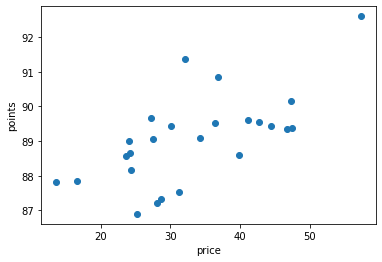

In [12]:
plt.scatter(wine_country_df.price, wine_country_df.points)
plt.xlabel('price')
plt.ylabel('points')
plt.show()

In [13]:
X = wine_country_df.price.values.reshape(-1, 1)
X[:5]

array([[28.68453608],
       [46.65322581],
       [32.07731092],
       [13.61538462],
       [47.30555556]])

In [14]:
X.shape

(25, 1)

In [15]:
y = wine_country_df.points

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(25,)


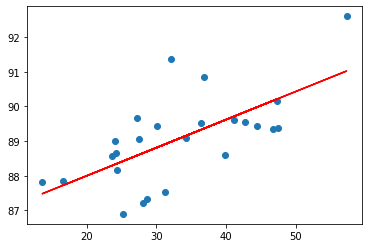

In [16]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [17]:
print(model.coef_)
print(model.intercept_)

[0.08129141]
86.37002223629253
